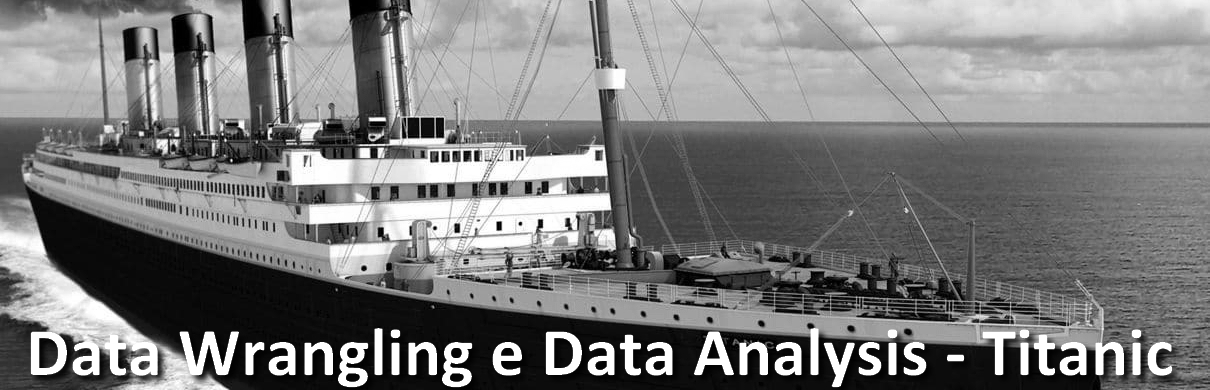
---

# <center> História - Titanic
<p style='text-align: justify;'>O RMS Titanic foi um navio de passageiros britânico, projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews. Sua construção começou em março de 1909 e seu lançamento ao mar ocorreu em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".
<p style='text-align: justify;'>A embarcação partiu em sua viagem inaugural de Southampton com destino a Nova Iorque em 10 de abril de 1912. Colidiu com um iceberg na proa dianteira do lado direito às 23h40 de 14 de abril, naufragando na madrugada do dia seguinte, com mais de 1.500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos do projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, acarretando mudanças nas leis internacionais de navegação, que permanecem em vigor mais de um século depois.
<p style='text-align: justify;'>Os destroços do Titanic foram procurados por décadas até serem encontrados, em 1985, por uma equipe liderada por Robert Ballard. Ele se encontra a 3.843 metros de profundidade e a 650 quilômetros ao sudeste de Terra Nova, no Canadá. Sua história e naufrágio permanecem no imaginário popular, levando à produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic, de 1997. Até hoje é um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.
    
<p style='text-align: right;'> <i>Fonte: https://pt.wikipedia.org/wiki/RMS_Titanic </p>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 1. Introdução

<p style='text-align: justify;'>Para este projeto, fora selecionado o conjunto clássico de dados do Titanic, contendo uma amostra dos passageiros do navio, incluindo sexo, idade, custo da passagem, classe e porto de embarque, e se eles sobreviveram ao desastre, além de outras variáveis que serão apresentadas.</p>

## 1.1. Descrição das variáveis
| **Variável** 	| **Descrição** 	|  	|  	|  	|
|:---:	|:---:	|:---:	|:---:	|:---:	|
| **PassangerID** 	| Número de identificação do passageiro na base de dados. 	|  	|  	|  	|
| **Survived** 	| Variável target, informa se o passageiro sobreviveu ao desastre ou não. ( 0 = Não \| 1 = Sim ) 	|  	|  	|  	|
| **Pclass** 	| Indica a classe do bilhete do passageiro. 	|  	|  	|  	|
| **Name** 	| Nome completo do passageiro. 	|  	|  	|  	|
| **Sex** 	| Sexo do passageiro. 	|  	|  	|  	|
| **Age** 	| Idade do passageiro. 	|  	|  	|  	|
| **SibSp** 	| Quantidade de cônjuges e/ou irmãos do passageiro, à bordo 	|  	|  	|  	|
| **Parch** 	| Quantidade de pais e/ou filhos do passageiro, à bordo. 	|  	|  	|  	|
| **Ticket** 	| Número do bilhete do passageiro. 	|  	|  	|  	|
| **Fare** 	| Preço da passagem paga pelo passageiro. 	|  	|  	|  	|
| **Cabin** 	| Número da cabine do passageiro. 	|  	|  	|  	|
| **Embarked** 	| Porto de embarque do passageiro. ( C = Cherbourg \| Q = Queenstown \| S = Southampton ) 	|  	|  	|  	|

## 1.2. Objetivo
#### Responder as seguintes questões:
 1. Qual gênero que teve a maior chance de sobreviver?
 2. Qual a faixa etária da idade que teve maiores chancer de sobreviver?
 3. Qual classe teve maior chance de sobrevivência?

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 2. Importação dos pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 3. Carregamento do Dataset

In [2]:
dfTitanic = pd.read_csv('BaseTitanic.csv')

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 4. Visualização Geral do Dataset

In [3]:
# Visualização das primeiras linhas do Dataset
dfTitanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Tamanho de linhas e colunas do Dataset (o Dataset é composto de 891 linhas e 12 colunas)
dfTitanic.shape

(891, 12)

In [5]:
# Visualização básica das informações do Dataset
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Visualização das variáveis numéricas do Dataset
dfTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Visualização das variáveis categóricas do Dataset
dfTitanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<table><td bgcolor=#7FFFD4 style='text-align: center; font-size: 13px'><b>1. Nota-se que não há homônimos na base de dados.</b></td>
<td bgcolor=#7FFFD4 style='text-align: center; font-size: 13px'><b>2. Cerca de 65% dos passageiros eram do sexo masculino.</b></td>
<td bgcolor=#7FFFD4 style='text-align: center; font-size: 13px'><b>3. Há valores ausentes nas colunas "Age", "Cabin" e "Embarked".</b></td>
<td bgcolor=#7FFFD4 style='text-align: center; font-size: 13px'><b>4. A maioria das pessoas (72%) embarcou no porto de Southampton.</b></td></table>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 5. Tratamento dos dados

### 5.1. Verificação dos dados ausentes no Dataset

In [8]:
# Ordenação das colunas com maior quantidade de valores nulos no Dataset
dfTitanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

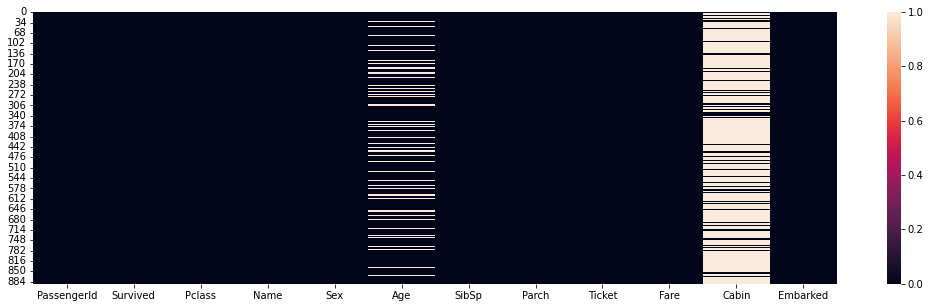

In [9]:
plt.figure(figsize=(18, 5))
sns.heatmap(dfTitanic.isnull())

#### 5.1.1. Tratando a coluna "Embarked" - Dados Ausentes

In [10]:
# Identificando e exibindo as linhas com valores NaN na coluna Embarked
dfTitanic.loc[dfTitanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Verificando o número de passageiros por Porto embarcado
dfTitanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# Verificando se há correspondência no Dataset dos valores Ticket e Cabin
dfTitanic[(dfTitanic['Embarked'].notnull()) & ((dfTitanic['Ticket'] == '113572') | (dfTitanic['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 14px'><b>Observa-se que os dois passageiros, muito provavelmente, embarcaram no mesmo porto, uma vez que as variáveis "Ticket" e "Cabin" são idênticas entre eles. Como a busca por registros semelhantes não retornou nenhum resultado, substituiremos os valores NaN pela MODA da coluna em questão, no caso o valor 'S'.</b></td></table>

In [13]:
# Substituindo os valores NaN da coluna "Embarked" pelo valor mais frequente na coluna
dfTitanic.Embarked.fillna(dfTitanic.Embarked.mode()[0], inplace=True)

In [14]:
dfTitanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 5.1.2. Tratando a coluna "Age" - Dados Ausentes

In [15]:
# Exibindo a quantidade de valores NaN na coluna "Age"
dfTitanic.Age.isnull().sum()

177

In [16]:
# Verificando o número de passageiros por sexo
dfTitanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Determinando a mediana baseada nas colunas "Pclass" e "Sex" do passageiro (arredondando o valor)
medianaIdades = round(dfTitanic.groupby(['Pclass', 'Sex'])['Age'].median(), 0)
medianaIdades

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [18]:
# Retornando os 5 primeiros valores para posterior comparação
dfTitanic.loc[dfTitanic.Age.isnull()][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [19]:
# Criação da função que percorrerá o Dataset substituindo valores NaN pela mediana correspondente.
def substituirNaN(linha):
    if pd.isnull(linha['Age']):
        return medianaIdades[linha['Pclass'], linha['Sex']]
    else:
        return linha['Age']

In [20]:
# Aplicação da função substituirNaN ao Dataset
dfTitanic['Age'] = dfTitanic.apply(substituirNaN, axis=1)

In [21]:
# Reexibindo as 5 primeiras linhas que retornavam valores NaN, nota-se que obtivemos sucesso
dfTitanic.loc[[5, 17, 19, 26, 28]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,22.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,22.0,0,0,330959,7.8792,NaN,Q


#### 5.1.3. Tratando a coluna "Cabin" - Dados Ausentes

In [22]:
# Verificando a porcentagem de valores NaN na coluna "Cabin"
dfTitanic.Cabin.isnull().sum() / dfTitanic.shape[0]

0.7710437710437711

In [23]:
dfTitanic.drop('Cabin', axis=1, inplace=True)
dfTitanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Optei por remover a coluna "Cabin", uma vez que a existência de mais de 75% de valores ausentes (NaN) poderão certamente, comprometer as futuras análises e/ou aplicações de algoritmos de <i>Machine Learning</i>.</b></td></table>

<AxesSubplot:>

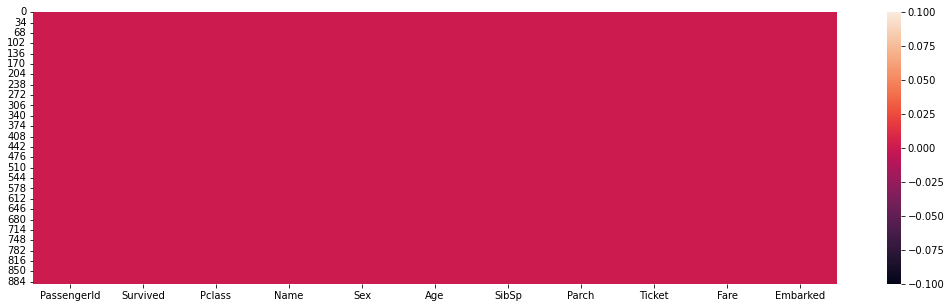

In [24]:
# Exibição do gráfico de calor, agora não há mais valores NaN
plt.figure(figsize=(18, 5))
sns.heatmap(dfTitanic.isnull())

### 5.2. Eliminação das colunas indesejáveis

In [25]:
dfTitanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [26]:
dfTitanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Remoção das seguintes colunas: 'PassangerId', 'Name' e 'Ticket', uma vez que para a realização da análise exploratória dos dados, não as considero de suma importância.</b></td>

### 5.3. Criando um Range para os valores contidos na coluna 'Age'

In [27]:
# Visando facilitar a visualização dos gráficos, optei pela criação de grupos para as idades dos passageiros
rangeIdades = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dfTitanic['RangeAge'] = pd.cut(dfTitanic.Age, range(0, 81, 10), right=False, labels=rangeIdades)
dfTitanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,RangeAge
0,0,3,male,22.0,1,0,7.2500,S,20-29
1,1,1,female,38.0,1,0,71.2833,C,30-39
2,1,3,female,26.0,0,0,7.9250,S,20-29


### 5.4. Criando uma coluna para representar o número de familiares do passageiro (SibSp + Parch)

In [28]:
dfTitanic['NumberRelatives'] = dfTitanic['SibSp'] + dfTitanic['Parch']

In [29]:
dfTitanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
dfTitanic.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,RangeAge,NumberRelatives
0,0,3,male,22.0,7.2500,S,20-29,1
1,1,1,female,38.0,71.2833,C,30-39,1
2,1,3,female,26.0,7.9250,S,20-29,0


<table><tr><td bgcolor=#7FFFD4 style='text-align: justify;' font-size: 13px><b>A criação das colunas "RangeAge", bem como da coluna "NumberRelatives" fora realizada para facilitar a análise e a visualização dos dados nos gráficos que seguirão.<br><br>
Após a conclusão  do processo de <i>Data Wrangling</i>, acredito que o <i>Dataset</i> do Titanic esteja adequado para começarmos a efetuar a análise exploratória dos dados.</b></td></table>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 6. Exportando a base de dados

In [30]:
dfTitanic.to_csv('baseTitanicEditada.csv', index=False)

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Efetuada a exportação da base de dados ora tratada, em formato .CSV com nome "baseTitanicEditada.csv" para uma futura aplicação de algoritmos de <i>Machine Learning</i>.</b></td></table>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 7. Análise Explotarória dos Dados

<Figure size 1296x360 with 0 Axes>

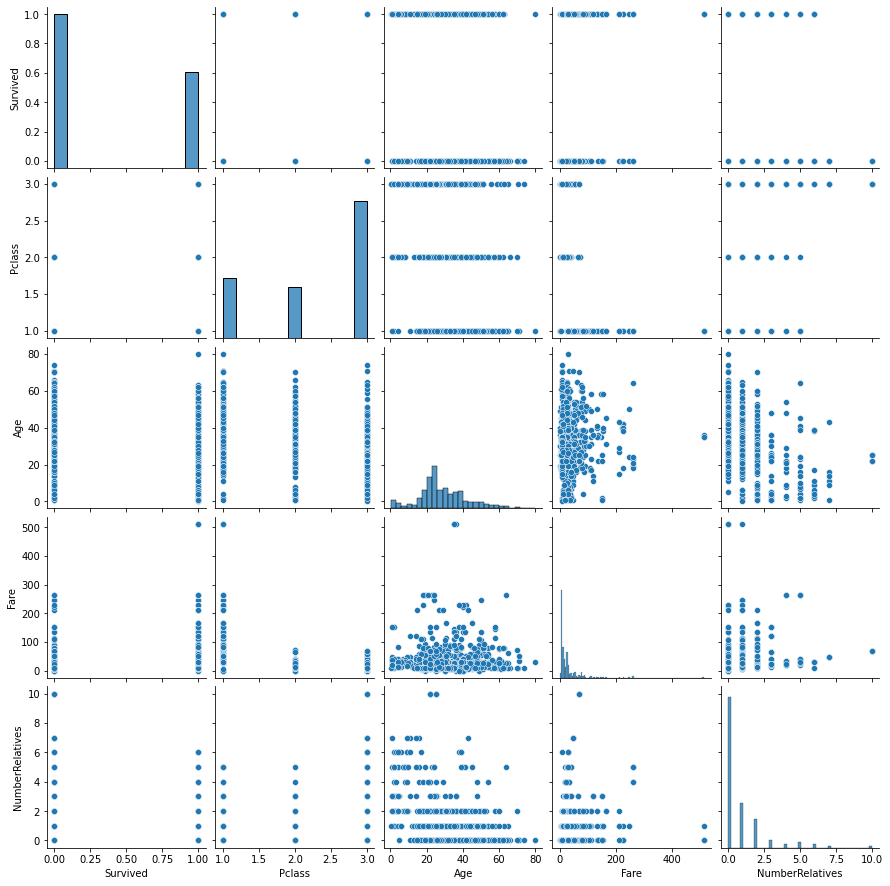

In [31]:
# Verificando a distribuição dos dados
plt.figure(figsize=(18, 5))
sns.pairplot(data=dfTitanic)
plt.show()

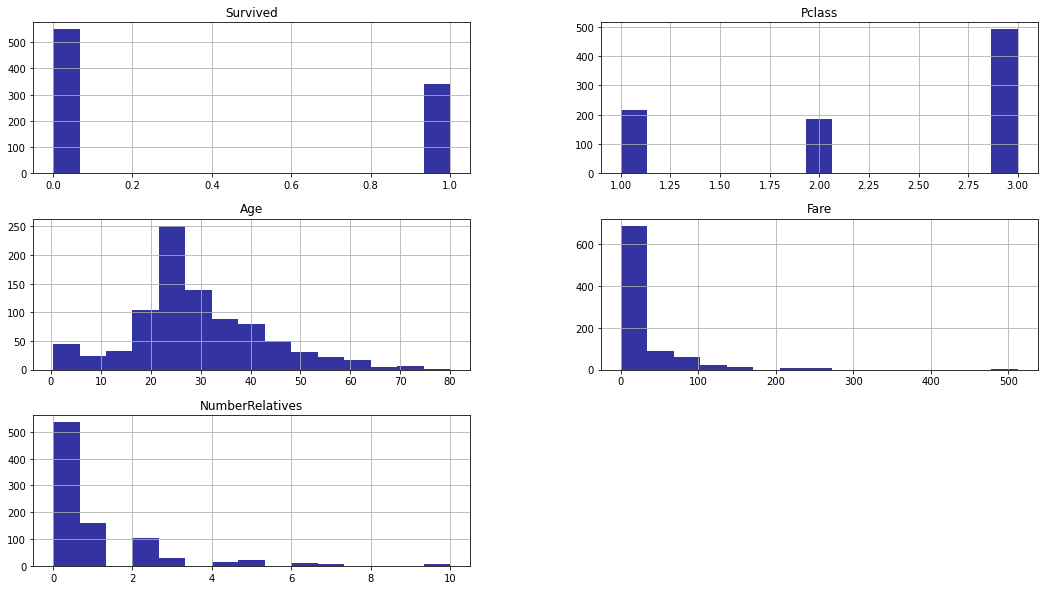

In [32]:
# Criação de histogramas
dfTitanic.hist(bins=15, color='darkblue', alpha=0.8, figsize=(18, 10))
plt.show()

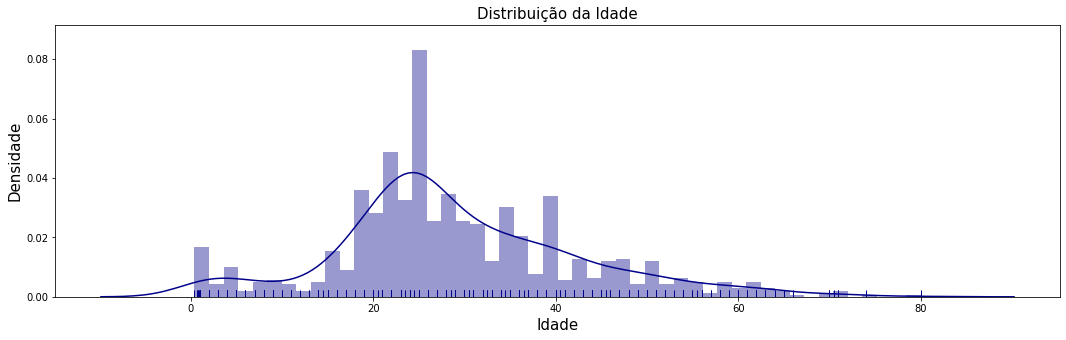

In [33]:
# Visualizando melhor o histograma da coluna "Age"
plt.figure(figsize=(18, 5))
sns.distplot(dfTitanic['Age'], color="darkblue", bins=50, rug=True)
plt.title('Distribuição da Idade', fontsize=15), plt.xlabel(
    'Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>De acordo com o histograma, podemos observar uma maior concentração dos dados em passageiros cujas idades estejam entre 18 e 40 anos, com o pico batendo em cerca de 29 anos.</b></td></table>

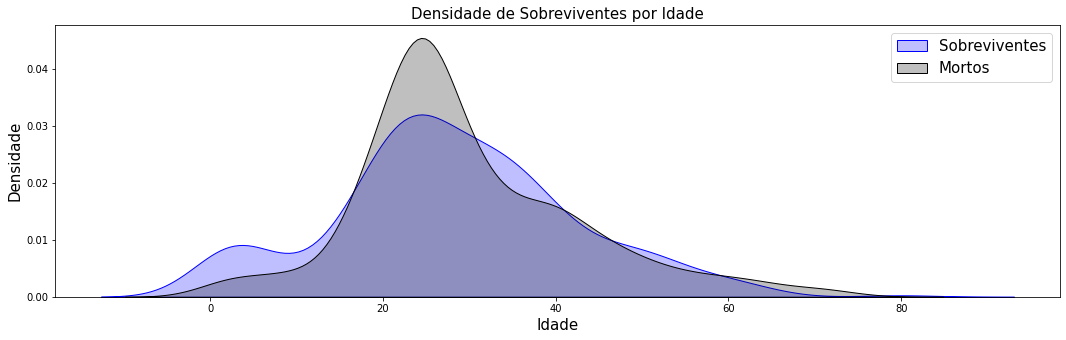

In [34]:
# Gráfico de densidade de Sobreviventes por Idade
plt.figure(figsize=(18, 5))
sns.kdeplot(dfTitanic['Age'][dfTitanic['Survived'] == 1],
            color='blue', shade=True)
sns.kdeplot(dfTitanic['Age'][dfTitanic['Survived'] == 0],
            color='black', shade=True)
plt.legend(['Sobreviventes', 'Mortos'], fontsize=15)
plt.title('Densidade de Sobreviventes por Idade',
          fontsize=15), plt.xlabel('Idade', fontsize=15)
plt.ylabel('Densidade', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify;' font-size: 13px><b>O gráfico deixa evidente que a maior parte das pessoas que não sobreviveram ao desastre, segue a linha de tendência da idade, concentrado entre as idade de 20 à 40 anos, com o pico batendo em 29 anos.</b></td></table>

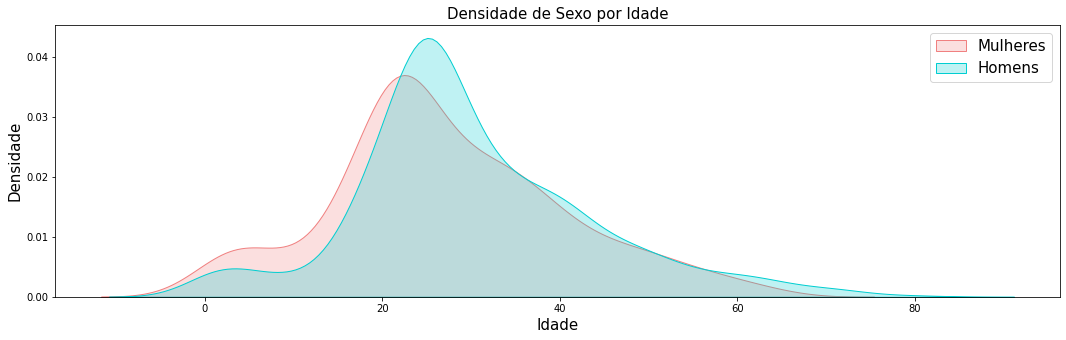

In [35]:
# Gráfico de densidade de Sexo por Idade
plt.figure(figsize=(18, 5))
sns.kdeplot(dfTitanic['Age'][dfTitanic['Sex'] == 'female'],
            color='lightcoral', shade=True)
sns.kdeplot(dfTitanic['Age'][dfTitanic['Sex'] == 'male'],
            color='darkturquoise', shade=True)
plt.legend(['Mulheres', 'Homens'], fontsize=15)
plt.title('Densidade de Sexo por Idade', fontsize=15), plt.xlabel(
    'Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Com a visualização do gráfico acima, podemos observar que em geral as mulheres são mais jovens que os homens.</b></td></table>

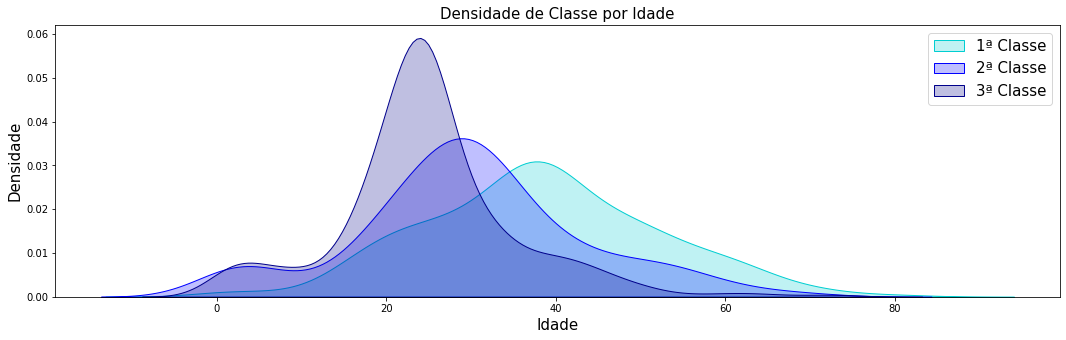

In [36]:
# Gráfico de densidade de Classes por Idade
plt.figure(figsize=(18, 5))
sns.kdeplot(dfTitanic['Age'][dfTitanic['Pclass'] == 1],
            color='darkturquoise', shade=True)
sns.kdeplot(dfTitanic['Age'][dfTitanic['Pclass'] == 2],
            color='blue', shade=True)
sns.kdeplot(dfTitanic['Age'][dfTitanic['Pclass'] == 3],
            color='darkblue', shade=True)
plt.legend(['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=15)
plt.title('Densidade de Classe por Idade', fontsize=15), plt.xlabel(
    'Idade', fontsize=15), plt.ylabel('Densidade', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Duas considerações importantes podem ser reparadas por meio da análise do gráfico acima: <br>1ª - Quanto maior a idade, melhor a classe do passageiro. <br>2º - Haviam poucas crianças e adolescentes na 1ª Classe.</b></td></table>

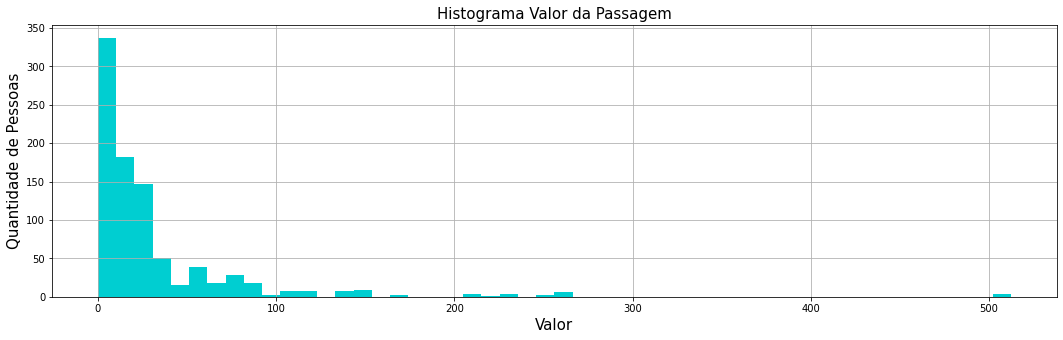

In [37]:
# Histograma do Valor da Tarifa
plt.figure(figsize=(18, 5))
dfTitanic['Fare'].hist(bins=50, color='darkturquoise')
plt.title('Histograma Valor da Passagem',
          fontsize=15), plt.xlabel('Valor', fontsize=15)
plt.ylabel('Quantidade de Pessoas', fontsize=15)
plt.show()

In [38]:
# Valor do ticket médio
round(dfTitanic.Fare.mean(), 2)

32.2

In [39]:
# Verificação dos passageiros que pagaram mais de 500 pela passagem.
dfTitanic.loc[dfTitanic['Fare'] >= 250]

,Survived,Pclass,Sex,Age,Fare,Embarked,RangeAge,NumberRelatives
27,0,1,male,19.0,263.0000,S,10-19,5
88,1,1,female,23.0,263.0000,S,20-29,5
258,1,1,female,35.0,512.3292,C,30-39,0
311,1,1,female,18.0,262.3750,C,10-19,4
341,1,1,female,24.0,263.0000,S,20-29,5
438,0,1,male,64.0,263.0000,S,60-69,5
679,1,1,male,36.0,512.3292,C,30-39,1
737,1,1,male,35.0,512.3292,C,30-39,0
742,1,1,female,21.0,262.3750,C,20-29,4


<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>A maioria dos passageiros pagou menos de 40 pela passagem. Observa-se casos isolados nos quais passageiros desembolsaram um valor de 8 à 10 vezes o valor do <i>ticket</i> médio (R$ 32), todos fazendo parte da 1ª classe, como notado na tabela acima.</b></td></table>

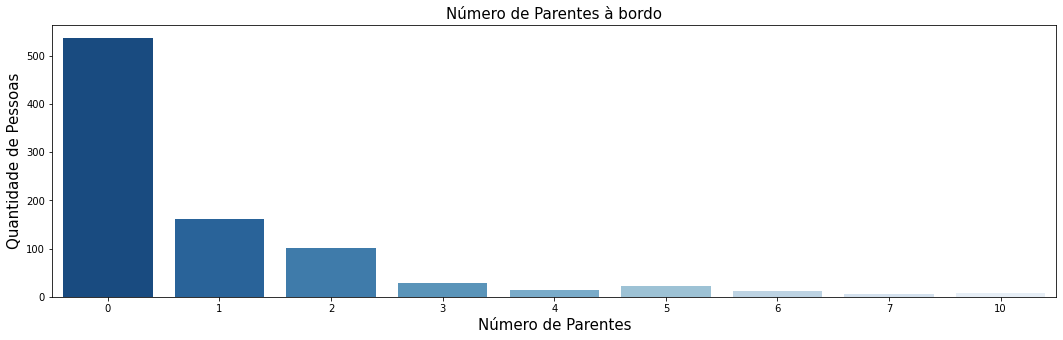

In [40]:
# Número de parentes à bordo
plt.figure(figsize=(18, 5))
sns.countplot('NumberRelatives', data=dfTitanic, palette='Blues_r')
plt.title('Número de Parentes à bordo', fontsize=15)
plt.xlabel('Número de Parentes', fontsize=15), plt.ylabel(
    'Quantidade de Pessoas', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Mais de 60% dos passageiros estavam viajando sozinho. Fora essa quantidade, o número mais comum de familiares à bordo da embarcação variavam entre 1 e 3.</b></td></table>

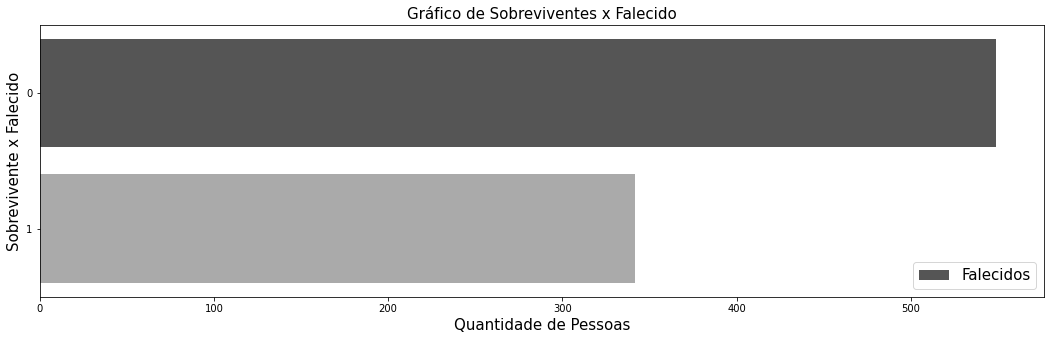

In [41]:
# Gráfico de Sobreviventes
plt.figure(figsize=(18, 5))
sns.countplot(y='Survived', data=dfTitanic, palette='gray')
plt.title('Gráfico de Sobreviventes x Falecido', fontsize=15)
plt.xlabel('Quantidade de Pessoas', fontsize=15), plt.ylabel(
    'Sobrevivente x Falecido', fontsize=15)
plt.legend(['Falecidos'], fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>De acordo com os dados no <i>Dataset</i> cerca de 2/3 dos passageiros faleceu no desastre. Por ser apenas uma amostra, realizei uma consulta em registros históricos e constatei que realmente, 68.1% dos passageiros do RMS Titanic não sobreviveu.</b></td></table>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 8. Objetivo

## 8.1. Qual gênero que teve a maior chance de sobreviver?
> #### Será que as mulheres tiveram mais chances de sobreviver do que os homens? Verificaremos esta hipótese a seguir.

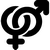 

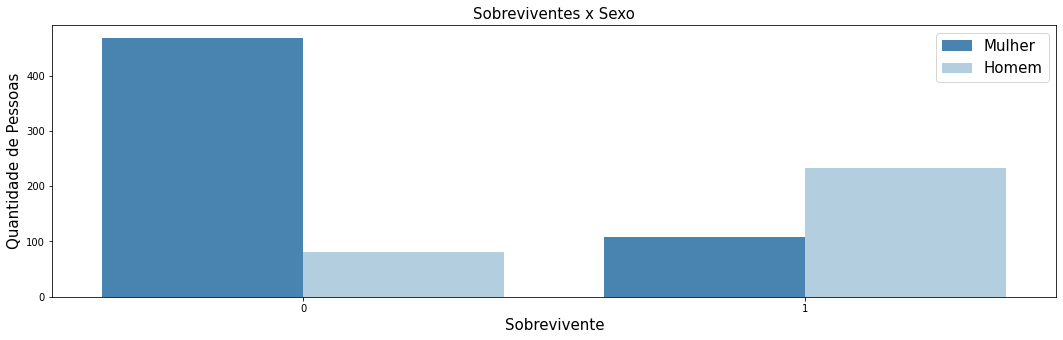

In [42]:
# Gráfico de sobreviventes de acordo com o sexo
plt.figure(figsize=(18, 5))
sns.countplot('Survived', data=dfTitanic, hue='Sex', palette='Blues_r')
plt.legend(['Mulher', 'Homem'], fontsize=15)
plt.title('Sobreviventes x Sexo', fontsize=15)
plt.xlabel('Sobrevivente', fontsize=15), plt.ylabel(
    'Quantidade de Pessoas', fontsize=15)
plt.show()

In [43]:
# Exibição das tabelas com a quantidade e a porcentagem de sobreviventes por sexo
pd.crosstab(dfTitanic['Survived'], dfTitanic['Sex']
            ), dfTitanic.groupby('Sex').Survived.mean()

(Sex       female  male
 Survived              
 0             81   468
 1            233   109,
 Sex
 female    0.742038
 male      0.188908
 Name: Survived, dtype: float64)

> #### Vamos representar essas tabelas de uma forma mais agradável e de fácil ~visualização abaixo.

In [44]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
sobreviventes = dfTitanic[dfTitanic['Survived'] == True]
falecidos = dfTitanic[dfTitanic['Survived'] == False]
generoSobrevivente = sobreviventes.groupby(['Sex']).size().values
generoFalecidos = falecidos.groupby(['Sex']).size().values
totalPassageiros = generoSobrevivente + generoFalecidos
percGeneroSobreviventes = (generoSobrevivente / totalPassageiros) * 100
percGeneroFalecidos = (generoFalecidos / totalPassageiros) * 100

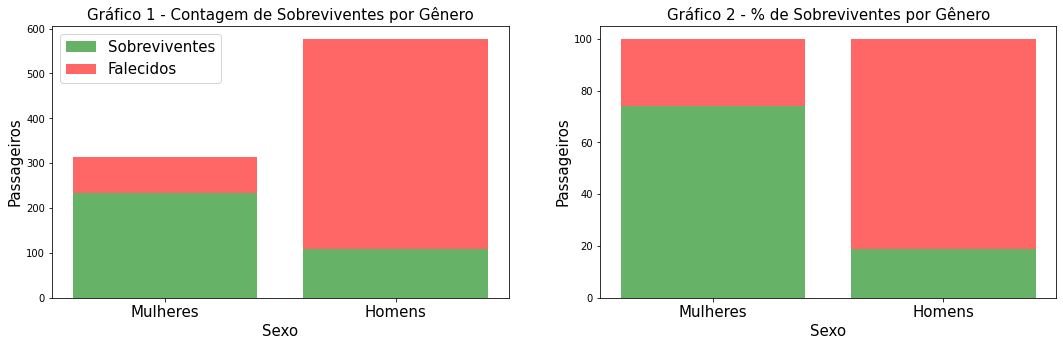

In [45]:
# Vamos plotar dois gráficos de mais fácil interpretação
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação ao seu gênero (Sexo)
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação ao gênero
f, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 5))
gra1.bar(range(len(generoSobrevivente)),
         generoSobrevivente, alpha=0.6, color='g')
gra1.bar(range(len(generoFalecidos)), generoFalecidos,
         bottom=generoSobrevivente, alpha=0.6, color='r')
plt.sca(gra1), gra1.set_ylabel('Passageiros',
                               fontsize=15), gra1.set_xlabel('Sexo', fontsize=15)
gra1.set_title('Gráfico 1 - Contagem de Sobreviventes por Gênero', fontsize=15)
plt.xticks([0, 1], ['Mulheres', 'Homens'], fontsize=15)
plt.legend(['Sobreviventes', 'Falecidos'], loc='upper left', fontsize=15)

gra2.bar(range(len(percGeneroSobreviventes)),
         percGeneroSobreviventes, alpha=0.6, color='g')
gra2.bar(range(len(percGeneroFalecidos)), percGeneroFalecidos,
         bottom=percGeneroSobreviventes, alpha=0.6, color='r')
plt.sca(gra2), gra2.set_ylabel('Passageiros',
                               fontsize=15), gra2.set_xlabel('Sexo', fontsize=15)
gra2.set_title('Gráfico 2 - % de Sobreviventes por Gênero', fontsize=15)
plt.xticks([0, 1], ['Mulheres', 'Homens'], fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Fica nítido que o <u>sexo da pessoa influenciou diretamente na chance de sobrevivência</u>, uma vez que aproximadamente 75% das mulheres sobreviveram ao desastre contra 18% dos homens, conforme explícito no Gráfico 2.</b></td></table>

## 8.2. Qual a faixa etária da idade que teve maiores chances de sobreviver?

> #### Haviam algumas crianças e idosos à bordo, vamos verificar a chance de sobrevivência desses grupos de passageiros.

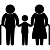

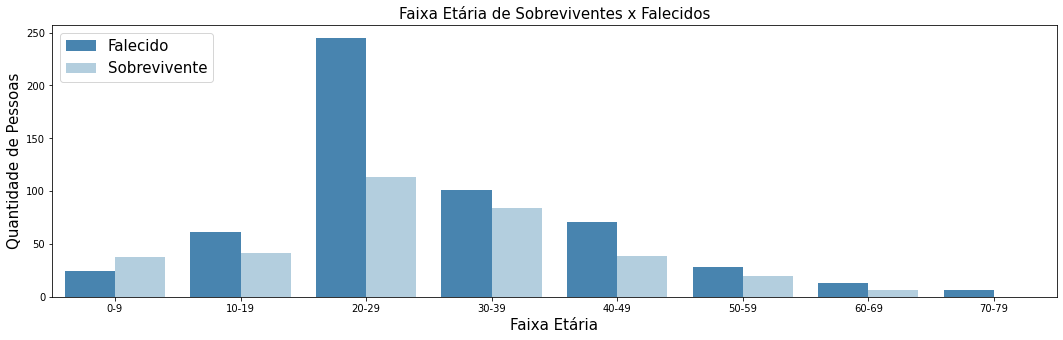

In [46]:
plt.figure(figsize=(18, 5))
sns.countplot('RangeAge', hue='Survived', data=dfTitanic, palette='Blues_r')
plt.xlabel('Faixa Etária', fontsize=15), plt.ylabel(
    'Quantidade de Pessoas', fontsize=15)
plt.title('Faixa Etária de Sobreviventes x Falecidos', fontsize=15)
plt.legend(['Falecido', 'Sobrevivente'], loc='upper left', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Observa-se que as crianças tiveram mais chances de sobreviver do que qualquer outra faixa etária. Já as pessoas com mais de 70 anos, provavelmente por conta de suas condições físicas, não tiveram a menor chance de sobreviver ao desastre. De igual modo como fizemos com a visualização dos gráficos por gênero, faremos logo à seguir para a faixa etária.</b></td></table>

In [47]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
faixaEtariaSobrevivente = sobreviventes.groupby(['RangeAge']).size().values
faixaEtariaFalecidos = falecidos.groupby(['RangeAge']).size().values
totalPassageiros = faixaEtariaSobrevivente + faixaEtariaFalecidos
percfaixaEtariaSobreviventes = (
    faixaEtariaSobrevivente / totalPassageiros) * 100
percfaixaEtariaFalecidos = (faixaEtariaFalecidos / totalPassageiros) * 100

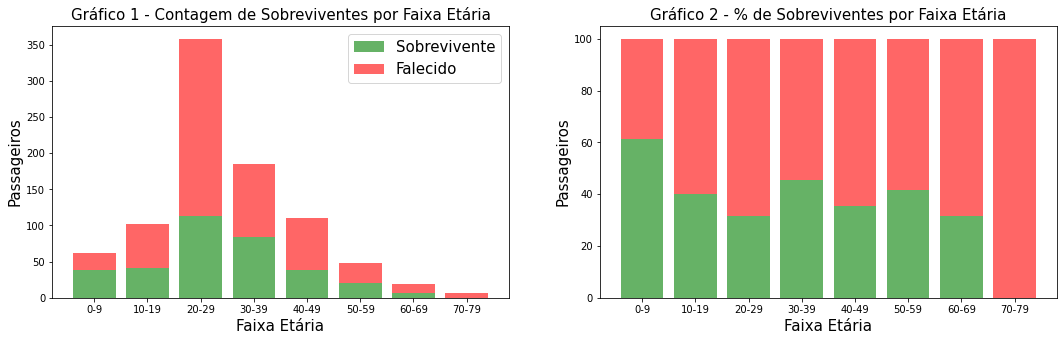

In [48]:
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação à faixa etária
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação à faixa etária
f, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 5))
gra1.bar(range(len(faixaEtariaSobrevivente)),
         faixaEtariaSobrevivente, alpha=0.6, color='g')
gra1.bar(range(len(faixaEtariaFalecidos)), faixaEtariaFalecidos,
         bottom=faixaEtariaSobrevivente, alpha=0.6, color='r')
plt.sca(gra1),  gra1.set_ylabel('Passageiros',
                                fontsize=15), gra1.set_xlabel('Faixa Etária', fontsize=15)
gra1.set_title(
    'Gráfico 1 - Contagem de Sobreviventes por Faixa Etária', fontsize=15)
plt.xticks(np.array(range(len(rangeIdades))), rangeIdades)
plt.legend(['Sobrevivente', 'Falecido'], loc='upper right', fontsize=15)

gra2.bar(range(len(percfaixaEtariaSobreviventes)),
         percfaixaEtariaSobreviventes, alpha=0.6, color='g')
gra2.bar(range(len(percfaixaEtariaFalecidos)), percfaixaEtariaFalecidos, bottom=percfaixaEtariaSobreviventes,
         alpha=0.6, color='r')
plt.sca(gra2), gra2.set_ylabel('Passageiros',
                               fontsize=15), gra2.set_xlabel('Faixa Etária', fontsize=15)
gra2.set_title('Gráfico 2 - % de Sobreviventes por Faixa Etária', fontsize=15)
plt.xticks(np.array(range(len(rangeIdades))), rangeIdades)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>Fica evidenciado então o comentado acima. Os gráficos mostram claramente que as <u>crianças foram as que tiveram maior chance de sobrevivência</u>, seguidas das pessoas com idade entre 30 e 39 anos. outro lado as pessoas que menos chances tiveram são os idosos com idade acima de 70 anos.</b></td></table>

## 8.3. Qual classe social teve maiores chances de sobreviver?
> #### Vamos verificar se a classe influencia diretamente na chance de sobrevivência

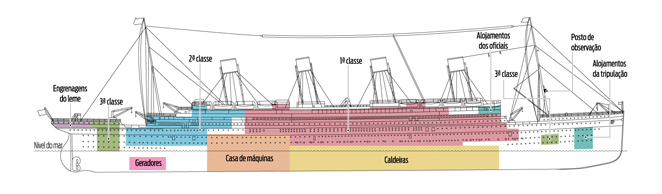
<p style='text-align: center; font-size: 12px'><i>Imagem da divisão das classes do navio RMS Titanic. Fonte: Titânicos em Ação.</i></p>

In [49]:
# Exibição das tabelas com a quantidade e a porcentagem de sobreviventes por classe
pd.crosstab(dfTitanic['Survived'], dfTitanic['Pclass']
            ), dfTitanic.groupby('Pclass').Survived.mean()

(Pclass      1   2    3
 Survived              
 0          80  97  372
 1         136  87  119,
 Pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: Survived, dtype: float64)

In [50]:
# Declaração e atribuição de variáveis para faciliar a manipulação dos dados na célula seguinte
classeSobrevivente = sobreviventes.groupby(['Pclass']).size().values
classeFalecido = falecidos.groupby(['Pclass']).size().values
totalPassageiros = classeSobrevivente + classeFalecido
percClasseSobrevivente = (classeSobrevivente / totalPassageiros) * 100
percClasseFalecido = (classeFalecido / totalPassageiros) * 100

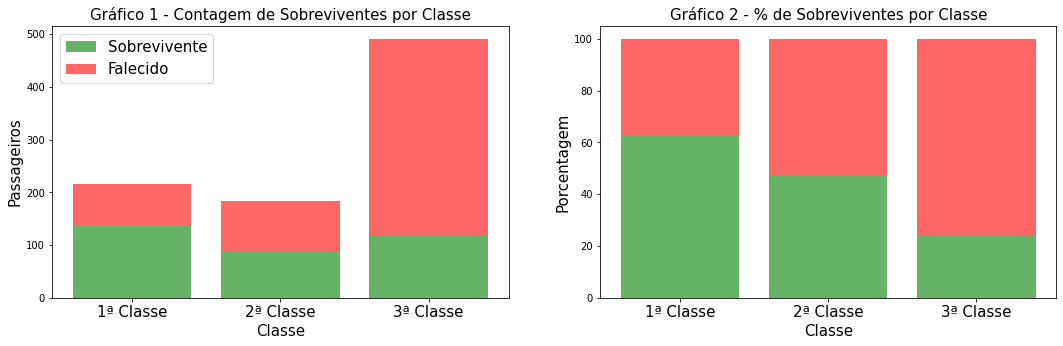

In [51]:
# Gráfico 1 representará a quantidade ordinal de pessoas que sobreviveram em relação à classe
# Gráfico 2 representará a porcentagem de sobreviventes e falecidos em relação à classe
f, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 5))
gra1.bar(range(len(classeSobrevivente)),
         classeSobrevivente, alpha=0.6, color='g')
gra1.bar(range(len(classeFalecido)), classeFalecido,
         bottom=classeSobrevivente, alpha=0.6, color='r')
plt.sca(gra1), gra1.set_ylabel('Passageiros',
                               fontsize=15), gra1.set_xlabel('Classe', fontsize=15),
gra1.set_title('Gráfico 1 - Contagem de Sobreviventes por Classe', fontsize=15)
plt.legend(['Sobrevivente', 'Falecido'], loc='upper left', fontsize=15)
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=15)

gra2.bar(range(len(percClasseSobrevivente)),
         percClasseSobrevivente, alpha=0.6, color='g')
gra2.bar(range(len(percClasseFalecido)), percClasseFalecido,
         bottom=percClasseSobrevivente, alpha=0.6, color='r')
plt.sca(gra2), plt.xticks(
    [0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'], fontsize=15)
gra2.set_ylabel('Porcentagem', fontsize=15), gra2.set_xlabel(
    'Classe', fontsize=15)
gra2.set_title('Gráfico 2 - % de Sobreviventes por Classe', fontsize=15)
plt.show()

<table><tr><td bgcolor=#7FFFD4 style='text-align: justify; font-size: 13px'><b>De acordo com o exposto no Gráfico 2, podemos reparar que <u>a classe foi um fator determinante para a sobrevivência do passageiro</u>. Em que pese o navio ter começado a afundar pela proa, local mais próximo da 1ª classe, podemos reparar que os passageiros da 1ª classe tiveram mais chances de sobreviver.</b></td></table>

###### <center> ---------------------------------------------------------------------------------------------------------------------------

# 9. Conclusões

* O navio RMS Titanic colidiu com o iceberg no dia 14 de abril de 1912, na parta da proa, lateral direita, perto das 23h50. De acordo com relatos e documentários à 00h20 a tripulação começou a colocar <u>mulheres e crianças nos poucos botes salva vidas que haviam disponíveis</u><i> (por considerarem o navio "inafundável" os projetistas optaram por deixar o navio mais aparentemente agradável em detrimento à segurança).</i><br>

><span style="color:darkgreen">Isso explica a grande diferença na relação de sobreviventes por Sexo e Faixa Etária.</font>

* Os compartimentos da frente do navio encheram de água por volta das 02h05, fazendo a proa afundar e a popa elevar acima do nível da água. 15 minutos depois o navio partiu-se em dois, sendo que a proa afundou primeiro, seguida da popa alguns minutos depois.<br>

><span style="color:darkgreen">Apesar da 1ª classe estar mais próxima do ponto crítico do navio e a proa, local no qual começavam a distribuilçao das cabines da 1ª classe, afundar primeiro, as pessoas com um maior "poder aquisitivo" tiveram mais chances de sobreviver.</font>


* O Dataset possui algumas limitações:

 1. Valores ausentes para as variáveis 'Cabin', 'Age' e 'Embarked' podem prejudicar a análise exploratória dos dados.
 2. Trata-se apenas de uma amostra, a quantidade total de passageiros do navio era mais de 2.000 pessoas. Tal amostra representa aproximadamente 40% dos dados totais.


* Em que pese as limitações do ***Dataset***, acredito que os resultados disponibilizados aqui, por meio da análise exploratória dos dados, foram plenamente satisfatórios.   

###### <center> ---------------------------------------------------------------------------------------------------------------------------

|  	| Contatos 	|  	|
|:---:	|:---:	|:---:	|
| <img width=40 align='center' alt='Thiago Ferreira' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" /> 	| <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" /> 	| <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/facebook/facebook-original.svg" /> 	|
| [Linkedin](https://www.linkedin.com/in/tferreirasilva/) 	| [Github](https://github.com/ThiagoFerreiraWD) 	| [Facebook](https://www.facebook.com/thiago.ferreira.50746) 	|
|  	| Autor: **Thiago Ferreira** 	|  	|